In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import numpy as np

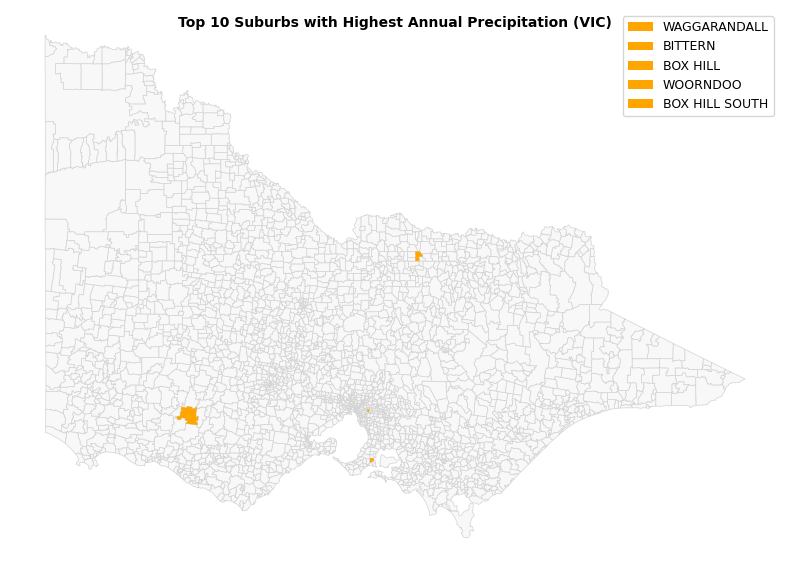

In [3]:
map_titles = {
    'crime':'Top 10 Suburbs with Highest Annual Crime Incidence Count (VIC)',
    'temp':'Top 10 Suburbs with Highest Annual Temperature (VIC)',
    'precip':'Top 10 Suburbs with Highest Annual Precipitation (VIC)'
}
gdf = gpd.read_file("../data/suburb-2-vic.geojson")

def plot_map(map_type,highlight_suburbs):
    map_title = map_titles[map_type]

    # Plot all suburbs
    gdf.plot(color='#F8F8F8',edgecolor='lightgrey',linewidth=0.5,figsize=(8, 8))

    # Plot highlighted suburbs
    highlight_color = 'orange'
    highlighted_gdf = gdf[gdf['vic_loca_2'].isin(highlight_suburbs)]
    highlighted_gdf.plot(color=highlight_color, ax=plt.gca())
    # Create legend for highlighted suburbs
    legend_elements = [Patch(facecolor=highlight_color, label=suburb) for suburb in highlight_suburbs]
    plt.legend(handles=legend_elements, loc='upper right', fontsize=9)

    # Plot with title
    plt.axis('off')
    plt.suptitle(map_title, y=0.82, fontsize=10, fontweight='bold')
    plt.tight_layout()
    plt.show()
    return None

# Define the list of highlighted suburbs
suburbs = ['WAGGARANDALL','BITTERN','BOX HILL','WOORNDOO','BOX HILL SOUTH']
plot_map('precip',suburbs)

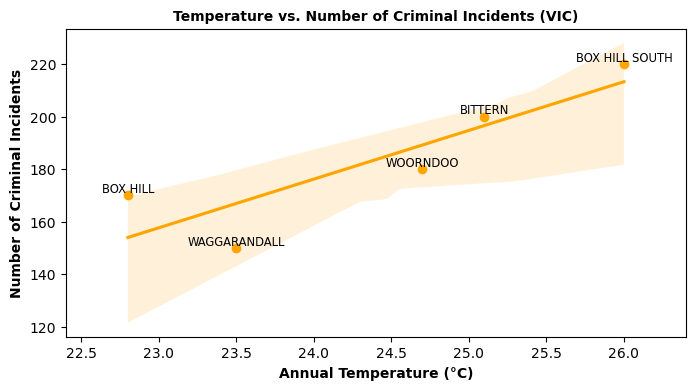

In [7]:
scatter_annotations = {
    'title': {
        'temp':'Temperature vs. Number of Criminal Incidents (VIC)',
        'precip':'Precipitation vs. Number of Criminal Incidents (VIC)'
    },
    'xlabel': {
        'temp':'Annual Temperature (°C)',
        'precip':'Annual Preciptation (mm)'
    }
}

def plot_scatter_chart(scatter_type,data):
    # Extracting data
    feature_data = [entry['feature_data'] for entry in data]
    count_data = [entry['crime_count'] for entry in data]
    suburbs = [entry['suburb'] for entry in data]

    # Create Scatter Plot
    plt.figure(figsize=(8, 4))
    plt.scatter(feature_data, count_data, color='orange')

    # Add Trend Line
    sns.regplot(x=feature_data, y=count_data, scatter=False, color='orange')

    # Add annotations for each suburb
    for i, suburb in enumerate(suburbs):
        plt.text(feature_data[i], count_data[i], suburb, horizontalalignment='center', verticalalignment='bottom', size='small')

    # Plot with title, xlabel, and ylabel
    plt.title(scatter_annotations['title'][scatter_type], fontweight='bold', fontsize=10)
    plt.xlabel(scatter_annotations['xlabel'][scatter_type], fontweight='bold')
    plt.ylabel('Number of Criminal Incidents', fontweight='bold')

    plt.xlim(min(feature_data) - 0.4, max(feature_data) + 0.4)
    plt.show()

# Example DataFrame with suburbs, temperature, and crime rate
scatter_data = [
    {'suburb': "WAGGARANDALL", 'feature_data': 23.5, 'crime_count': 150},
    {'suburb': "BITTERN", 'feature_data': 25.1, 'crime_count': 200},
    {'suburb': "BOX HILL", 'feature_data': 22.8, 'crime_count': 170},
    {'suburb': "WOORNDOO", 'feature_data': 24.7, 'crime_count': 180},
    {'suburb': "BOX HILL SOUTH", 'feature_data': 26.0, 'crime_count': 220}
]
plot_scatter_chart('temp',scatter_data)

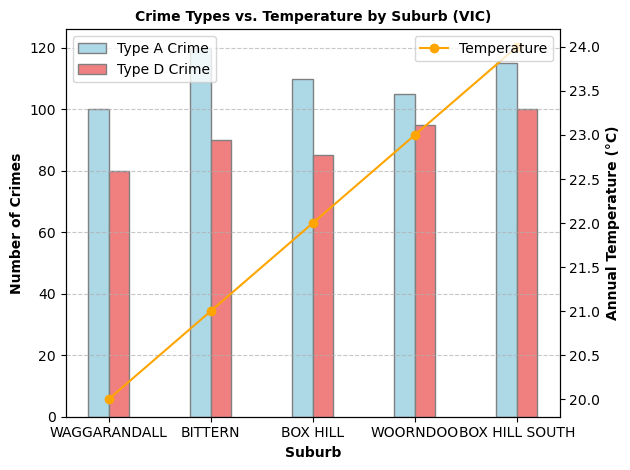

In [149]:
bar_annotations = {
    'title': {
        'temp':'Crime Types vs. Temperature by Suburb (VIC)',
        'precip':'Crime Types vs. Precipitation by Suburb (VIC)'
    },
    'ylabel': {
        'temp':'Annual Temperature (°C)',
        'precip':'Annual Preciptation (mm)'
    },
    'plotlabel': {
        'temp':'Temperature',
        'precip':'Preciptation'
    }
}

def plot_bar_chart(bar_type,data):
    # Set up the data for plotting
    x = np.arange(len(data['suburbs']))
    bar_width = 0.2
    fig, ax1 = plt.subplots()

    # Crime bars
    ax1.bar(x - bar_width/2, data['type_a'], bar_width, label='Type A Crime', color='#ADD8E6', edgecolor='grey')
    ax1.bar(x + bar_width/2, data['type_d'], bar_width, label='Type D Crime', color='#F08080', edgecolor='grey')

    # Temperature line plot
    ax2 = ax1.twinx()
    ax2.plot(x, data[bar_type], color='orange', marker='o', label=bar_annotations['plotlabel'][bar_type])

    # Adding labels and title
    ax1.set_xlabel('Suburb',fontweight='bold')
    ax1.set_ylabel('Number of Crimes',fontweight='bold')
    ax2.set_ylabel(bar_annotations['ylabel'][bar_type],fontweight='bold')
    ax1.set_title(bar_annotations['title'][bar_type], fontsize=10, fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_xticklabels(data['suburbs'])
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    ax1.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    return None

bar_data = {
    'suburbs':["WAGGARANDALL", "BITTERN", "BOX HILL","WOORNDOO","BOX HILL SOUTH"],
    'temp':[20, 21, 22, 23, 24],
    'type_a':[100, 120, 110, 105, 115],
    'type_d':[80, 90, 85, 95, 100]
}
plot_bar_chart('temp',bar_data)

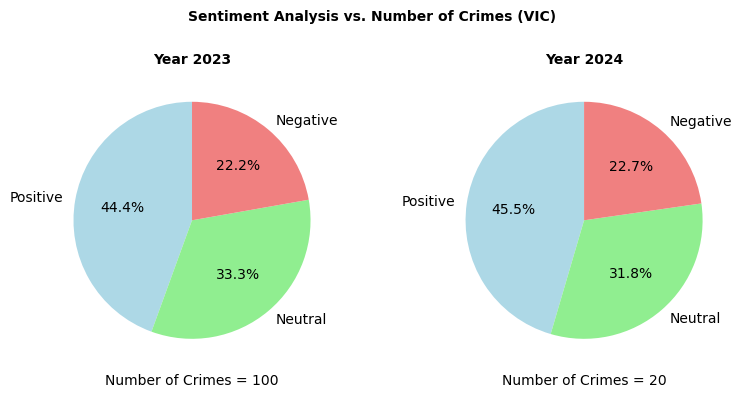

In [3]:
sentiments = ['Positive', 'Neutral', 'Negative']
colors = ['#ADD8E6', '#90EE90', '#F08080']

def plot_pie_chart(pie_data):
    years = list(pie_data.keys())
    plt.figure(figsize=(8, 4))
    for i, cur_year in enumerate(years):
        plt.subplot(1, len(years), i + 1)
        plt.pie(pie_data[cur_year]['counts'], labels=sentiments, autopct='%1.1f%%', startangle=90, colors=colors)
        plt.gca().set_aspect('equal')
        title = f'Year {cur_year}'  # Using f-string for string formatting
        plt.title(title, fontweight='semibold', fontsize=10)
        xlabel = f'Number of Crimes = {pie_data[cur_year]["crime_count"]}'  # Using f-string for string formatting
        plt.xlabel(xlabel, fontsize=10)

    plt.suptitle('Sentiment Analysis vs. Number of Crimes (VIC)', fontweight='bold', fontsize=10)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


pie_data = {
    '2023': {
        'counts':[40, 30, 20],
        'crime_count':100
    },
    '2024': {
        'counts':[50, 35, 25],
        'crime_count':20
    }
}
plot_pie_chart(pie_data)